In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [60]:
open_mouth_ds = pd.read_csv('open_mouth.csv', delimiter = ';', header = None)
#print(open_mouth_ds)
smile_ds = pd.read_csv('smile.csv', delimiter = ';', header = None)
kiss_ds = pd.read_csv('kiss.csv', delimiter = ';', header = None)
pl_ds = pd.read_csv('purse_lips.csv', delimiter = ';', header = None)

In [61]:
#each row represents one frame
#the columns have the position information in x,y pairs e.g col 0 is the x coordinate for the first landmark, col1 is the y coordinate
def pos_time (dataset, index):
    index = index-1
    x = dataset.iloc[:, index*2:index*2+2].values
    return x

In [62]:
#all measurements are normalised against the distance between the eyes
#vertical length of the mouth
def mouth_vlen(mouth_ds):
    v1 = pos_time(mouth_ds, 52)
    v2 = pos_time(mouth_ds, 58)
    n1 = pos_time(mouth_ds, 40)
    n2 = pos_time(mouth_ds, 43)
    ret = []
    for i in range(len(v1)):
        v = (abs(math.dist(v1[i], v2[i])))
        n = (abs(math.dist(n1[i], n2[i])))
        ret.append(v/n)
    return ret

#horizontal length of the mouth
def mouth_hlen(mouth_ds):
    v1 = pos_time(mouth_ds, 55)
    v2 = pos_time(mouth_ds, 49)
    n1 = pos_time(mouth_ds, 40)
    n2 = pos_time(mouth_ds, 43)
    ret = []
    for i in range(len(v1)):
        v = (abs(math.dist(v1[i], v2[i])))
        n = (abs(math.dist(n1[i], n2[i])))
        ret.append(v/n)
    return ret

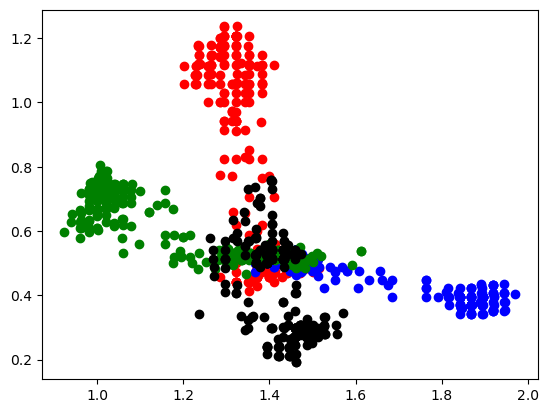

In [63]:
#different gestures represented
x_om = mouth_hlen(open_mouth_ds)
y_om = mouth_vlen(open_mouth_ds)

x_s = mouth_hlen(smile_ds)
y_s = mouth_vlen(smile_ds)

x_k = mouth_hlen(kiss_ds)
y_k = mouth_vlen(kiss_ds)

x_pl = mouth_hlen(pl_ds)
y_pl = mouth_vlen(pl_ds)


plt.scatter(x_om, y_om , color = 'red')
plt.scatter(x_s, y_s , color = 'blue')
plt.scatter(x_k, y_k , color = 'green')
plt.scatter(x_pl, y_pl , color = 'black')


plt.show()

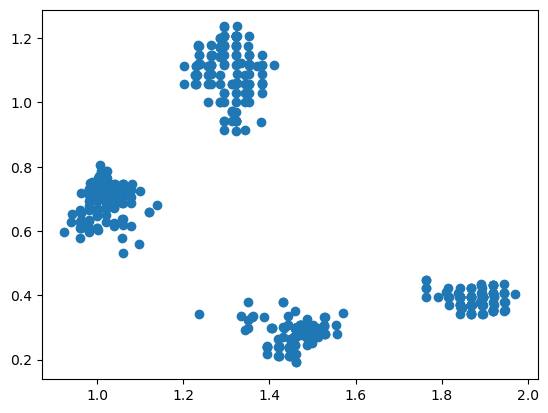

In [68]:
#Unfortunately these captures were "making the gestures" (i.e. opening and closing the mouth) 
#That's why I will need to isloate each gesture from the rest position and I will also give it a state number for classification purposes
new_ds = []
for x_i, y_i in zip(x_om,y_om):
    if y_i > 0.9:
        new_ds.append([x_i, y_i, 1])
        
for x_i, y_i in zip(x_s,y_s):
    if x_i > 1.7:
        new_ds.append([x_i, y_i, 2])
        
for x_i, y_i in zip(x_k,y_k):
    if x_i < 1.15:
        new_ds.append([x_i, y_i, 3])  
        
for x_i, y_i in zip(x_pl,y_pl):
    if y_i < 0.4:
        new_ds.append([x_i, y_i, 4])  

x = [sub[0] for sub in new_ds]
y = [sub[1] for sub in new_ds]

        

plt.scatter(x,y)
plt.show()


In [70]:
headers = ['mouth_hlen', 'mouth_vlen', 'gesture']
df = pd.DataFrame(new_ds, columns=headers)
print(df)

     mouth_hlen  mouth_vlen  gesture
0      1.323529    0.912239        1
1      1.322957    0.970169        1
2      1.342309    1.000000        1
3      1.352676    1.028967        1
4      1.382068    1.088162        1
..          ...         ...      ...
475    1.500450    0.279056        4
476    1.529459    0.279056        4
477    1.461176    0.298414        4
478    1.458331    0.351876        4
479    1.432634    0.378789        4

[480 rows x 3 columns]


In [73]:
df.to_csv('mouth_gestures_0.csv', index=False)